# Import Dependencies
#### **Tensorflow**
TensorFlow is an open-source library developed by Google primarily for deep learning applications. It also supports traditional machine learning. TensorFlow was originally developed for large numerical computations without keeping deep learning in mind. However, it proved to be very useful for deep learning development as well, and therefore Google open-sourced it.
TensorFlow accepts data in the form of multi-dimensional arrays of higher dimensions called tensors. Multi-dimensional arrays are very handy in handling large amounts of data.
#### **Keras**
Keras is a high-level, deep learning API developed by Google for implementing neural networks. It is written in Python and is used to make the implementation of neural networks easy. It also supports multiple backend neural network computation.                        Keras is relatively easy to learn and work with because it provides a python frontend with a high level of abstraction while having the option of multiple back-ends for computation purposes. This makes Keras slower than other deep learning frameworks, but extremely beginner-friendly.

**Sequential:** This is the Keras Sequential model, which allows you to create a linear stack of layers for building neural networks.

**Activation, Dropout, Flatten, Dense, Conv2D, and MaxPooling2D:** These are different types of layers that can be added to a neural network.

**image_dataset_from_directory:** A utility function for creating a dataset of images from a directory.

**ImageDataGenerator:** A class for generating augmented versions of images, which can be useful for data augmentation during training.

**load_img:** A function for loading an image from a file.

The **warnings.filterwarnings('ignore')** line is used to suppress any warnings that may be raised during the execution of the code. This is often done to avoid cluttering the output with non-critical messages.

**os:** The os module is imported for handling file operations and directory management.



In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


# Load the Training Dataset

In [2]:
path = "D:\Projects\Cat vs Dog Predictor Model\d_train"
classes = os.listdir(path)
classes

['cats', 'dogs']

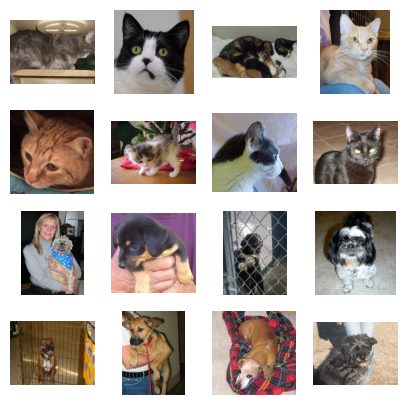

In [3]:
fig = plt.gcf()
fig.set_size_inches(5, 5)

cat_dir = os.path.join('D:\Projects\Cat vs Dog Predictor Model\d_train\cats')
dog_dir = os.path.join('D:\Projects\Cat vs Dog Predictor Model\d_train\dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()


**fig = plt.gcf():** This line gets the current figure (plot) in Matplotlib and assigns it to the variable fig. This figure will be used to set the size of the plot.

**fig.set_size_inches(5, 5):** This line sets the size of the figure to 5 inches by 5 inches. It determines the dimensions of the entire plot that will contain the grid of images.

**cat_dir and dog_dir:** These variables store the file paths to directories containing images of cats and dogs, respectively. The file paths are specified using the os.path.join function to ensure compatibility with different operating systems.

**cat_names and dog_names:** These variables store lists of file names (images) found in the cat_dir and dog_dir directories, respectively. The os.listdir function is used to retrieve the list of file names in each directory.

**pic_index = 210:** This variable stores the index (position) from which to start selecting images from the cat_names and dog_names lists. It starts at index 210, which suggests that this code is designed to display a specific set of images from the directories.

**cat_images and dog_images:** These lists comprehensions are used to create lists of file paths to the cat and dog images that will be displayed. The file paths are constructed by joining the directory paths with the file names, and they represent a range of images based on the pic_index value.

**The for loop:** This loop iterates over the combined list of cat_images and dog_images, displaying each image in a subplot of a 4x4 grid.

**sp = plt.subplot(4, 4, i+1):** This line creates a subplot within the grid. 4, 4 specifies a 4x4 grid, and i+1 is the position of the subplot within the grid. The subplots are numbered from left to right and top to bottom, starting from 1.

**sp.axis('Off'):** This line turns off the axis labels and ticks for the current subplot, making it a clean image display without axes.

**img = mpimg.imread(img_path):** This line reads and loads the image from the file path specified by img_path using Matplotlib's mpimg module.


In [4]:
base_dir = 'D:\Projects\Cat vs Dog Predictor Model\d_train'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
												image_size=(100,100),
												subset='training',
												seed = 1,
												validation_split=0.25,
												batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
												image_size=(100,100),
												subset='validation',
												seed = 1,
												validation_split=0.25,
												batch_size= 32)


Found 8005 files belonging to 2 classes.
Using 6004 files for training.
Found 8005 files belonging to 2 classes.
Using 2001 files for validation.


In [5]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(128, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(128, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(128, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(1, activation='sigmoid')
])


**tf.keras.models.Sequential([]):** This line initializes a sequential model, which allows you to define a neural network layer by layer. You can think of it as stacking layers sequentially.

**layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)):** This line adds the first convolutional layer to the model. It has 32 filters, each with a 3x3 kernel size, and uses the ReLU (Rectified Linear Unit) activation function. The input_shape parameter specifies that the model expects input images with dimensions 100x100 pixels and 3 color channels (RGB).

**layers.MaxPooling2D(2, 2):** This line adds a max-pooling layer immediately after the first convolutional layer. Max-pooling reduces the spatial dimensions of the feature maps by taking the maximum value in each 2x2 region.

The next three lines repeat the pattern of adding a convolutional layer followed by a max-pooling layer. The second convolutional layer has 64 filters, and the subsequent two convolutional layers also have 64 filters. All of them use ReLU activation functions and are followed by max-pooling layers with a 2x2 pool size. This helps the model learn hierarchical features from the input images.

**layers.Flatten():** This layer flattens the output from the previous layers into a 1D vector. It is necessary to transition from convolutional layers to fully connected layers.

**layers.Dense(128, activation='relu'):** This adds the first fully connected (Dense) layer with 128 neurons and a ReLU activation function.

**layers.BatchNormalization():** This layer applies batch normalization to normalize the activations of the previous layer. Batch normalization helps stabilize training and can speed up convergence.

**layers.Dense(128, activation='relu'):** Another fully connected layer with 128 neurons and ReLU activation follows the batch normalization.

**layers.Dropout(0.1):** Dropout is a regularization technique that randomly drops a fraction of the neurons during training to prevent overfitting. In this case, it drops 10% of the neurons.

**layers.BatchNormalization():** Another batch normalization layer follows the dropout layer.

**layers.Dense(128, activation='relu'):** Another fully connected layer with 128 neurons and ReLU activation follows the second batch normalization.

**layers.Dropout(0.2):** Another dropout layer, but this time it drops 20% of the neurons.

**layers.BatchNormalization():** The final batch normalization layer.

**layers.Dense(1, activation='sigmoid'):** This is the output layer with a single neuron and a sigmoid activation function. It's used for binary classification tasks, where the model predicts either 0 or 1 (e.g., binary image classification).

In [6]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 64)        0

####  **Visualize the model**
This function generates a graphical representation of the model's architecture, making it easier to understand and debug complex models. 

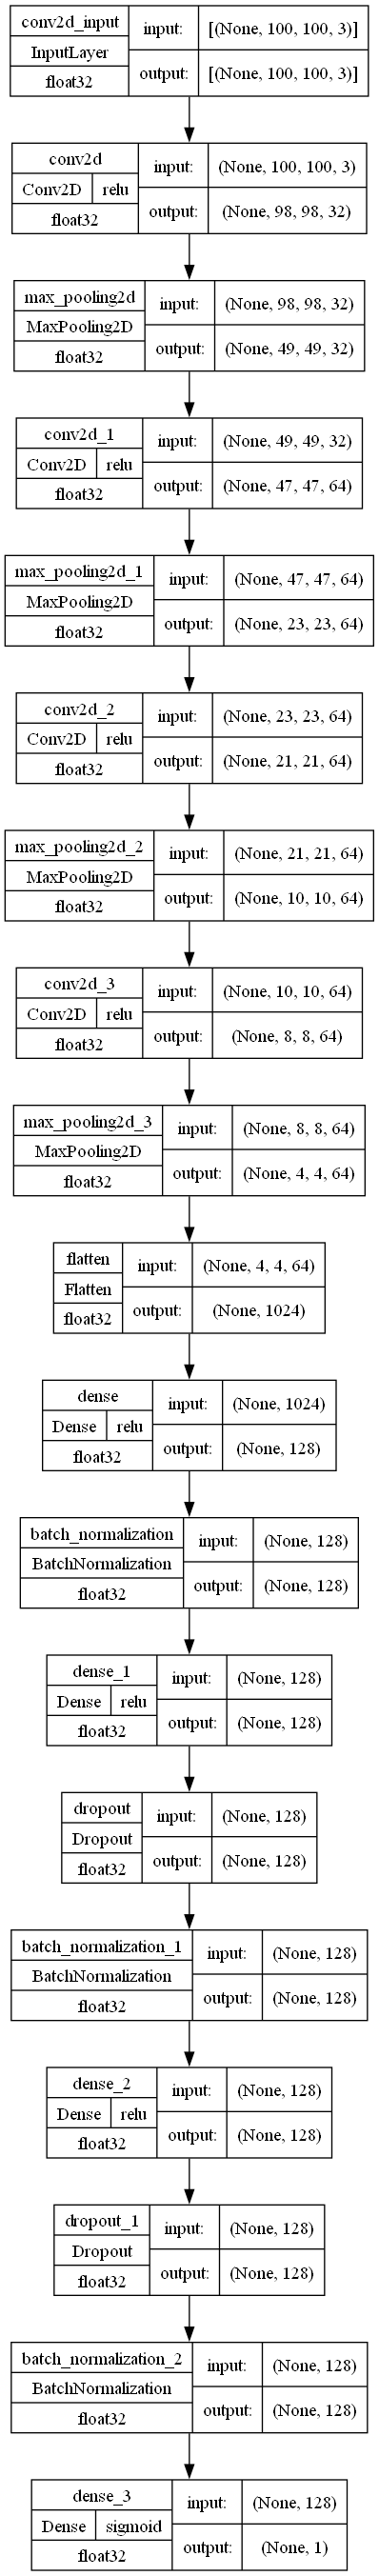

In [7]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


In [8]:
''' It is related to configuring the training process for a machine learning or deep learning model using the Keras 
library (which is integrated into TensorFlow 2.x and 3.x). In particular, it's configuring how a neural network model should be trained 
using binary classification, which means it's designed to make binary decisions (e.g., yes/no, 1/0).'''

model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)


In [9]:
# This code snippet is training a neural network model (model) using data generated by train_datagen for 10 epochs, 
# and it's monitoring the model's performance on the validation data provided by test_datagen. The training progress and
# results are stored in the history object, which can be used for further analysis and visualization.
    
history = model.fit(train_datagen,
		epochs=10,
		validation_data=test_datagen) 

Epoch 1/10
188/188 [==============================] - 89s 448ms/step - loss: 0.7634 - accuracy: 0.5496 - val_loss: 0.9379 - val_accuracy: 0.5032
Epoch 2/10
188/188 [==============================] - 86s 454ms/step - loss: 0.7103 - accuracy: 0.5848 - val_loss: 1.4935 - val_accuracy: 0.4983
Epoch 3/10
188/188 [==============================] - 84s 445ms/step - loss: 0.6598 - accuracy: 0.6204 - val_loss: 1.6727 - val_accuracy: 0.4983
Epoch 4/10
188/188 [==============================] - 86s 457ms/step - loss: 0.6392 - accuracy: 0.6352 - val_loss: 0.8830 - val_accuracy: 0.5007
Epoch 5/10
188/188 [==============================] - 84s 444ms/step - loss: 0.6129 - accuracy: 0.6662 - val_loss: 0.9713 - val_accuracy: 0.5117
Epoch 6/10
188/188 [==============================] - 84s 443ms/step - loss: 0.5906 - accuracy: 0.6919 - val_loss: 1.5181 - val_accuracy: 0.4993
Epoch 7/10
188/188 [==============================] - 83s 442ms/step - loss: 0.5327 - accuracy: 0.7365 - val_loss: 0.5975 - val_ac

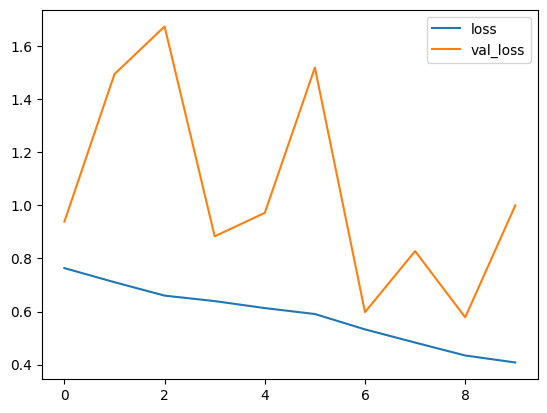

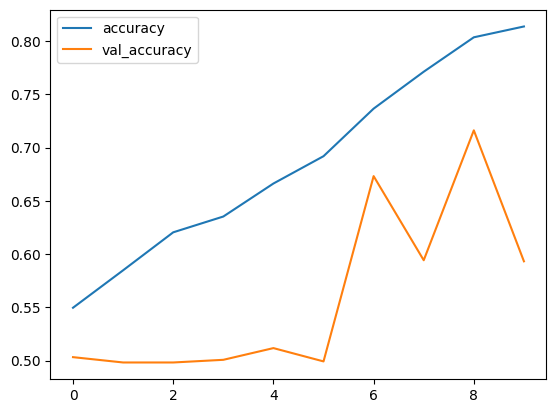

In [10]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show() 

**history_df.loc[:, ['loss', 'val_loss']].plot():** This line selects and plots the 'loss' and 'val_loss' columns from the DataFrame using .loc[]. 'loss' typically represents the training loss, which is a measure of how well the model is fitting the training data, while 'val_loss' represents the validation loss, which measures how well the model is performing on a separate validation dataset. The .plot() function is used to create a line plot of these two loss values over the training epochs.

**history_df.loc[:, ['accuracy', 'val_accuracy']].plot():** Similar to the previous line, this line selects and plots the 'accuracy' and 'val_accuracy' columns from the DataFrame. 'accuracy' typically represents the training accuracy, which is a measure of how accurately the model is classifying the training data, while 'val_accuracy' represents the validation accuracy, which measures accuracy on the validation dataset.

# Evaluation the model

1/1 [==============================] - 0s 267ms/step
[[0.9793079]]
Cat


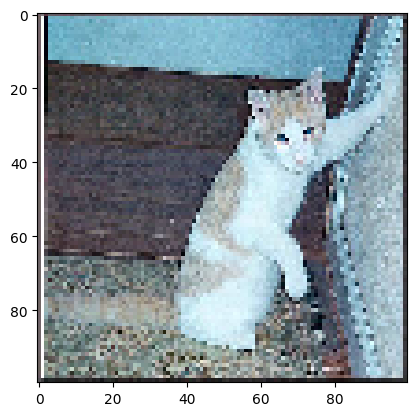

In [11]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('D:\Projects\Cat vs Dog Predictor Model\d_test\cats\cat.4001.jpg',target_size=(100,100))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)
print(result)


#Mapping result array with the main name list

if result >= 0.8:
    print("Cat")
else:
    print("Dog")


1/1 [==============================] - 0s 32ms/step
[[0.99167174]]
Dog


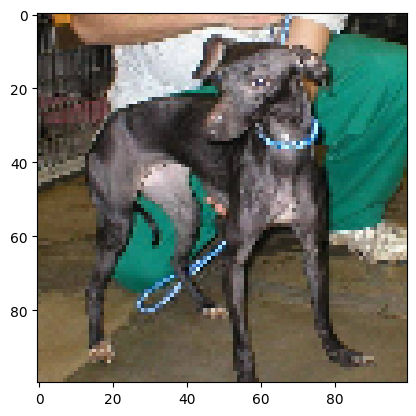

In [12]:
test_image = image.load_img('D:\Projects\Cat vs Dog Predictor Model\d_test\dogs\dog.4004.jpg', target_size=(100, 100))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)
print(result)
# Mapping result array with the main name list

if result >= 0.8:
    print("Dog")
else:
    print("Cat")
